# MODEL GENERATION OF GBM RANDOM PATHS

In this notebook I show how you can generate random paths according to a GBM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.models.gbm_process_simulator import get_paths_times
from financepy.models.gbm_process_simulator import get_assets_paths
from financepy.models.gbm_process_simulator import get_assets_paths_times


## Single Asset

We can generate time series for a single asset over time.

In [3]:
num_paths = 10000
num_time_steps = 2
t = 1.0
mu = 0.03
St=100.0
vol = 0.2
seed = 1912

In [4]:
(times, x) = get_paths_times(num_paths ,num_time_steps , t, mu, St, vol, seed)

This can be plotted

In [5]:
times

array([0. , 0.5, 1. ])

The distribution at time zero is peaked at 100.0

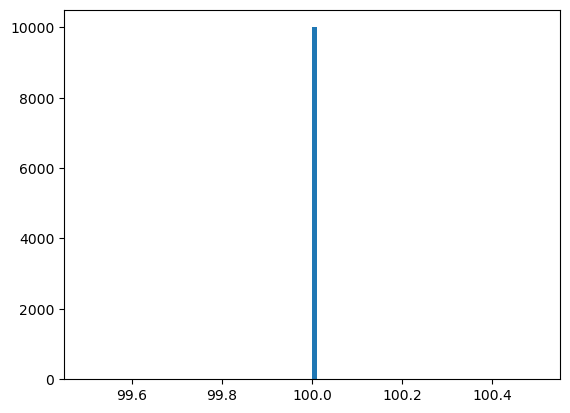

In [6]:
plt.hist(x[:,0], 100);

After a year there is a full lognormal distribution

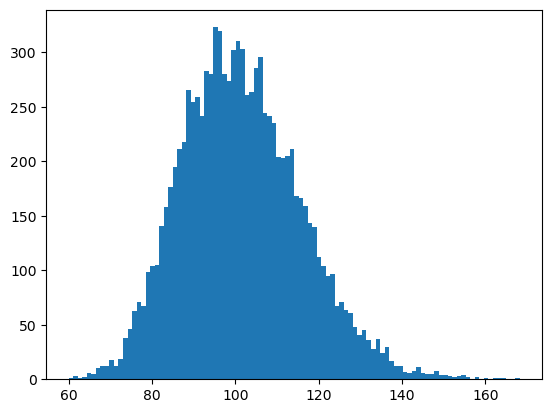

In [7]:
plt.hist(x[:,1], 100);

## Multiple Assets to One Time Horizon

In [8]:
num_assets = 2
num_paths = 10000
num_time_steps = 2
t = 1.0
mus = 0.03 * np.ones(num_assets)
stock_prices = 100.0 * np.ones(num_assets)
volatilities = 0.2 * np.ones(num_assets)
rho = 0.9999
corr_matrix = np.array([[1.0, rho],[rho, 1.0]])
seed = 1912

In [9]:
(times, x) = get_assets_paths(num_assets, num_paths, t,
                   mus, stock_prices, volatilities,
                   corr_matrix, seed)

In [10]:
times

array([0., 1.])

In [11]:
x.shape

(2, 10000)

## Multiple Assets and Times

In [12]:
num_assets = 2
num_paths = 10000
num_time_steps = 2
t = 1.0
mus = 0.03 * np.ones(num_assets)
stock_prices = 100.0 * np.ones(num_assets)
volatilities = 0.2 * np.ones(num_assets)
rho = 0.3
corr_matrix = np.array([[1.0, rho],[rho, 1.0]])
seed = 1912

In [13]:
mus, stock_prices, volatilities

(array([0.03, 0.03]), array([100., 100.]), array([0.2, 0.2]))

In [14]:
corr_matrix

array([[1. , 0.3],
       [0.3, 1. ]])

In [15]:
(times, x) = get_assets_paths_times(num_assets, num_paths, num_time_steps, t,
                   mus, stock_prices, volatilities,
                   corr_matrix, seed)

In [16]:
times

array([0. , 0.5, 1. ])

In [17]:
x.shape

(2, 10000, 3)

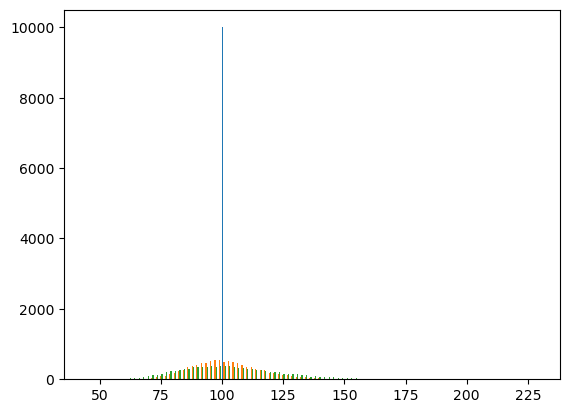

In [18]:
plt.hist(x[1,:], 100);

Copyright (c) 2019, Dominic O'Kane 